In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
train=pd.read_csv(r'C:\Users\enesm\OneDrive\Masaüstü\KAGGLE\Iyzico\Data\2-Sorted and Equalized\train_sorted.csv')
test=pd.read_csv(r'C:\Users\enesm\OneDrive\Masaüstü\KAGGLE\Iyzico\Data\2-Sorted and Equalized\test_sorted.csv')

In [3]:
train

,merchant_id,month_id,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count,year,month
0,merchant_43992,202001,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,4997,2020,1
1,merchant_47611,202001,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_80,Segment - 3,19878,2020,1
2,merchant_26604,202001,Merchant Source - 3,Settlement Period - 1,Working Type - 2,mcc_135,Segment - 4,2528,2020,1
3,merchant_50657,202001,Merchant Source - 1,Settlement Period - 1,Working Type - 2,mcc_38,Segment - 4,89,2020,1
4,merchant_60635,202001,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_55,Segment - 2,71957,2020,1
...,...,...,...,...,...,...,...,...,...,...
291137,merchant_67083,202309,Merchant Source - 1,Settlement Period - 1,Working Type - 6,mcc_169,Segment - 4,4,2023,9
291138,merchant_4263,202309,Merchant Source - 2,Settlement Period - 1,Working Type - 6,mcc_73,Segment - 4,4,2023,9
291139,merchant_11346,202309,Merchant Source - 1,Settlement Period - 1,Working Type - 6,mcc_169,Segment - 4,3,2023,9
291140,merchant_21397,202309,Merchant Source - 1,Settlement Period - 1,Working Type - 6,mcc_168,Segment - 4,3,2023,9


In [4]:
test

,merchant_id,month_id,year,month,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment
0,merchant_36004,202310,2023,10,Merchant Source - 1,Settlement Period - 1,Working Type - 2,mcc_144,Segment - 4
1,merchant_23099,202310,2023,10,Merchant Source - 1,Settlement Period - 1,Working Type - 5,mcc_3,Segment - 4
2,merchant_13105,202310,2023,10,Merchant Source - 1,Settlement Period - 1,Working Type - 3,mcc_155,Segment - 4
3,merchant_32059,202310,2023,10,Merchant Source - 2,Settlement Period - 1,Working Type - 2,mcc_1,Segment - 4
4,merchant_63368,202310,2023,10,Merchant Source - 1,Settlement Period - 1,Working Type - 6,mcc_35,Segment - 4
...,...,...,...,...,...,...,...,...,...
78175,merchant_5038,202312,2023,12,Merchant Source - 1,Settlement Period - 1,Working Type - 6,mcc_10,Segment - 4
78176,merchant_49937,202312,2023,12,Merchant Source - 1,Settlement Period - 1,Working Type - 6,mcc_68,Segment - 4
78177,merchant_6213,202312,2023,12,Merchant Source - 2,Settlement Period - 1,Working Type - 5,mcc_63,Segment - 4
78178,merchant_35969,202312,2023,12,Merchant Source - 1,Settlement Period - 1,Working Type - 6,mcc_110,Segment - 4


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_monthly_mean(df, column, value):
    # Filter based on the specified column and value
    filtered_data = df[df[column] == value]

    # Create a 'Year-Month' column for grouping
    filtered_data['Year_Month'] = filtered_data['year'].astype(str) + '-' + filtered_data['month'].astype(str).str.zfill(2)

    # Group by 'Year-Month' and calculate the mean
    monthly_mean = filtered_data.groupby('Year_Month')['net_payment_count'].mean()

    # Plotting
    plt.figure(figsize=(12, 6))
    monthly_mean.plot(kind='line', marker='o')
    plt.title(f'Monthly Mean of Net Payment Count for {value}')
    plt.xlabel('Year-Month')
    plt.ylabel('Mean Net Payment Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()




# Merchant source name

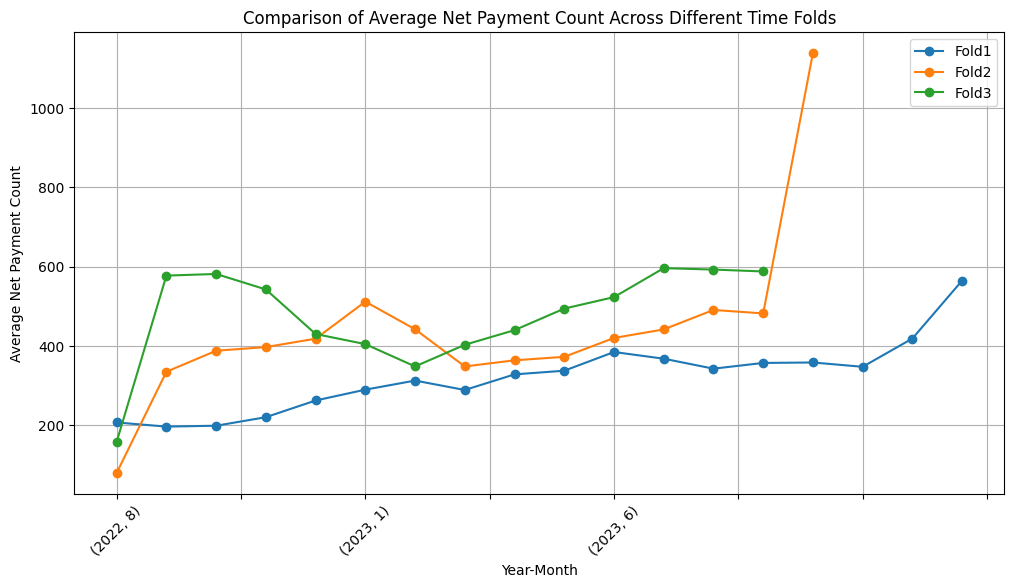

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame and it's already sorted by time (e.g., year and month)

# Number of rows in the DataFrame
n_rows = train.shape[0]

# Step 2: Split the Data into 3 Folds
fold_size = n_rows // 3
folds = {
    'Fold1': train.iloc[:fold_size],
    'Fold2': train.iloc[fold_size:2*fold_size],
    'Fold3': train.iloc[2*fold_size:]
}

# Step 3: Calculate and Plot the Average Target
plt.figure(figsize=(12, 6))

for fold_name, fold_data in folds.items():
    # Assuming 'net_payment_count' is your target variable
    monthly_mean = fold_data.groupby(['year', 'month'])['net_payment_count'].mean()
    monthly_mean.plot(kind='line', marker='o', label=fold_name)

plt.title('Comparison of Average Net Payment Count Across Different Time Folds')
plt.xlabel('Year-Month')
plt.ylabel('Average Net Payment Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\enesm\AppData\Local\Temp\ipykernel_32228\3838293721.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year_Month'] = filtered_data['year'].astype(str) + '-' + filtered_data['month'].astype(str).str.zfill(2)


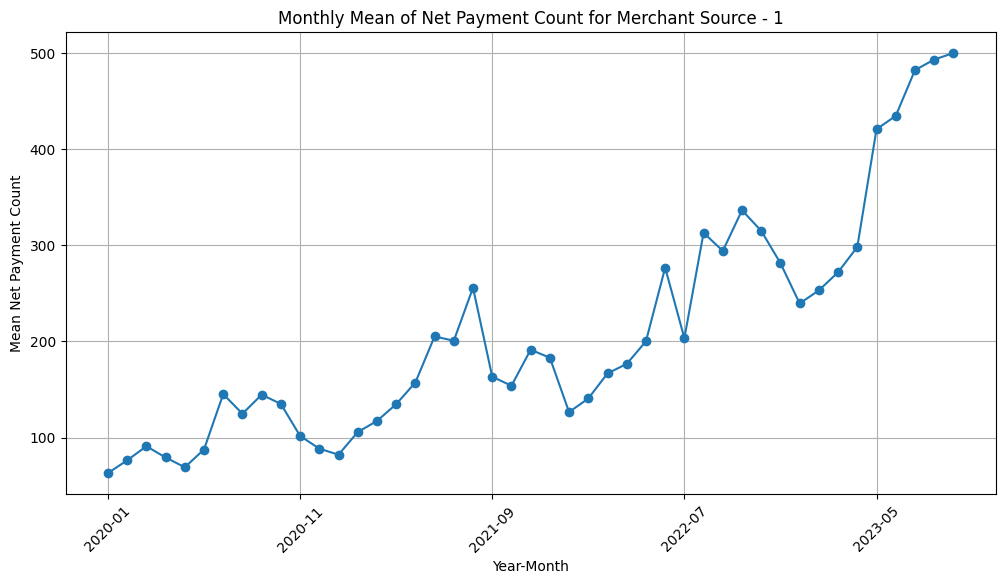

In [6]:
# Example usage
plot_monthly_mean(train, 'merchant_source_name', 'Merchant Source - 1')

C:\Users\enesm\AppData\Local\Temp\ipykernel_32228\3838293721.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year_Month'] = filtered_data['year'].astype(str) + '-' + filtered_data['month'].astype(str).str.zfill(2)


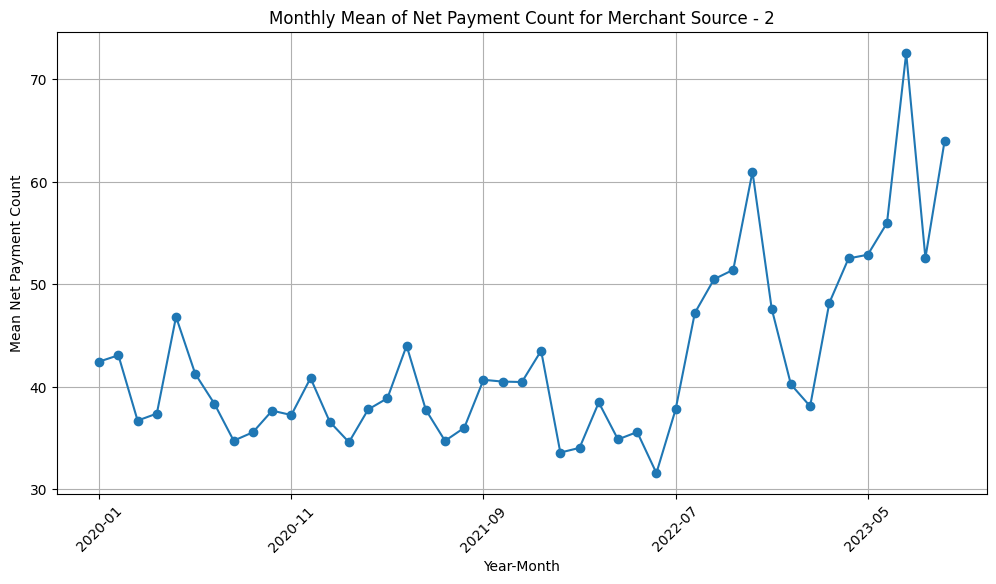

In [7]:
plot_monthly_mean(train, 'merchant_source_name', 'Merchant Source - 2')

C:\Users\enesm\AppData\Local\Temp\ipykernel_32228\3838293721.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year_Month'] = filtered_data['year'].astype(str) + '-' + filtered_data['month'].astype(str).str.zfill(2)


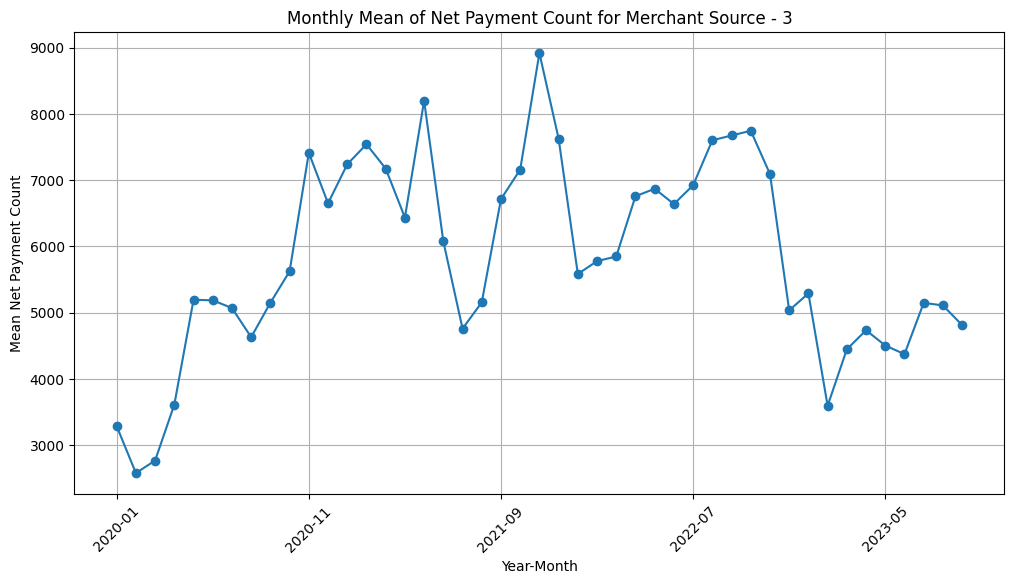

In [8]:
plot_monthly_mean(train, 'merchant_source_name', 'Merchant Source - 3')

In [9]:
train['merchant_source_name'].value_counts()

merchant_source_name
Merchant Source - 1    164996
Merchant Source - 2    112541
Merchant Source - 3     13605
Name: count, dtype: int64

# Settlement Period

In [10]:
train['settlement_period'].value_counts()

settlement_period
Settlement Period - 1    268906
Settlement Period - 3     20553
Settlement Period - 2      1683
Name: count, dtype: int64

C:\Users\enesm\AppData\Local\Temp\ipykernel_32228\3838293721.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year_Month'] = filtered_data['year'].astype(str) + '-' + filtered_data['month'].astype(str).str.zfill(2)


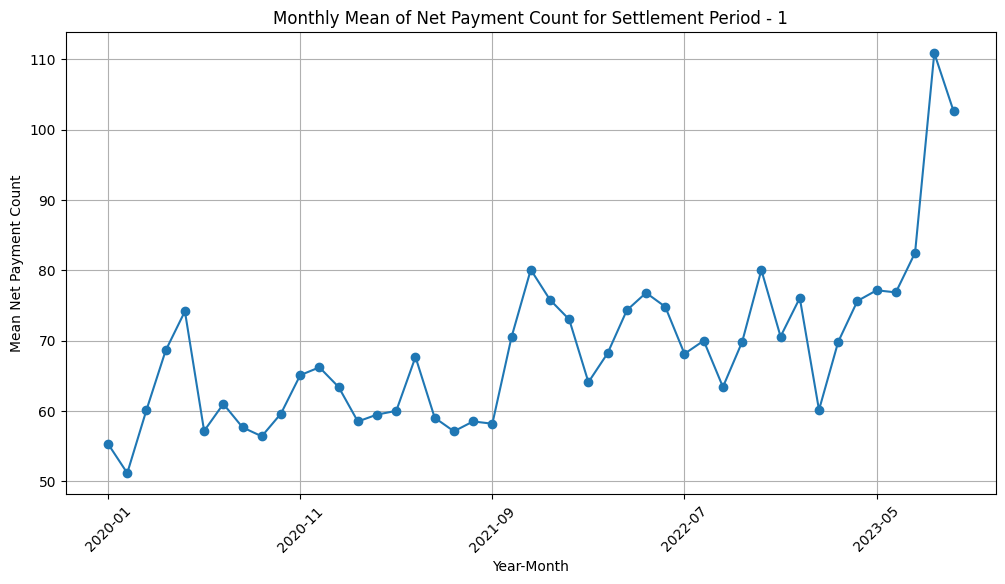

In [11]:
plot_monthly_mean(train, 'settlement_period', 'Settlement Period - 1')

C:\Users\enesm\AppData\Local\Temp\ipykernel_32228\3838293721.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year_Month'] = filtered_data['year'].astype(str) + '-' + filtered_data['month'].astype(str).str.zfill(2)


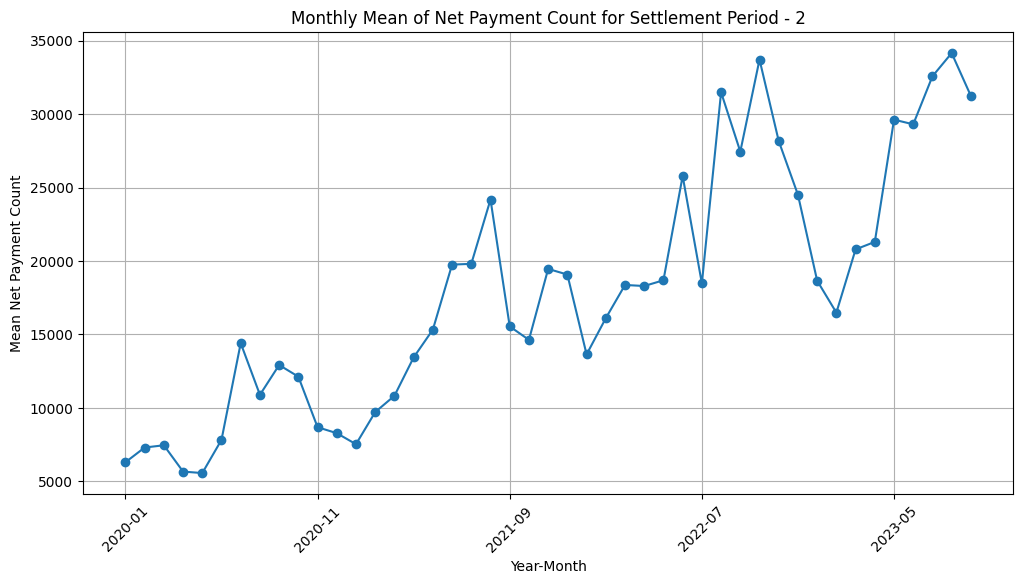

In [12]:
plot_monthly_mean(train, 'settlement_period', 'Settlement Period - 2')

C:\Users\enesm\AppData\Local\Temp\ipykernel_32228\3838293721.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year_Month'] = filtered_data['year'].astype(str) + '-' + filtered_data['month'].astype(str).str.zfill(2)


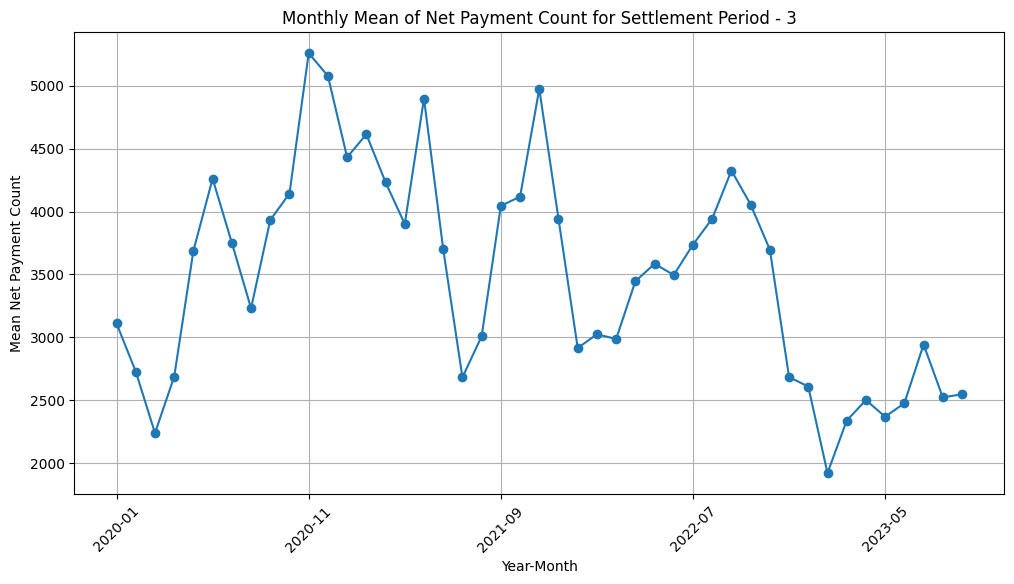

In [13]:
plot_monthly_mean(train, 'settlement_period', 'Settlement Period - 3')

# Working Type

In [14]:
train['working_type'].value_counts()

working_type
Working Type - 6    128755
Working Type - 5    116793
Working Type - 2     40071
Working Type - 3      5204
Working Type - 4       255
Working Type - 1        64
Name: count, dtype: int64

C:\Users\enesm\AppData\Local\Temp\ipykernel_32228\3838293721.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year_Month'] = filtered_data['year'].astype(str) + '-' + filtered_data['month'].astype(str).str.zfill(2)


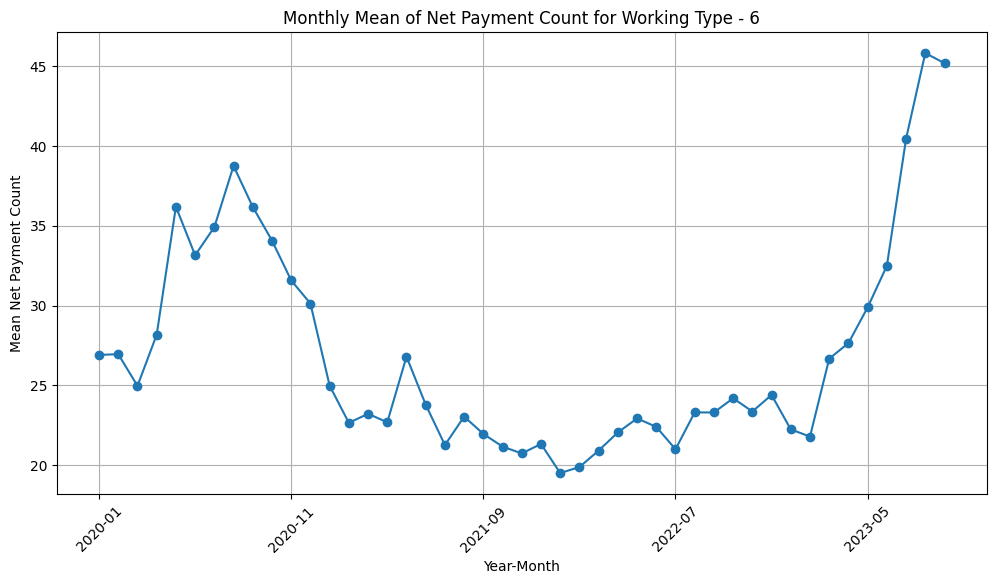

In [15]:
plot_monthly_mean(train, 'working_type', 'Working Type - 6')

C:\Users\enesm\AppData\Local\Temp\ipykernel_32228\3838293721.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year_Month'] = filtered_data['year'].astype(str) + '-' + filtered_data['month'].astype(str).str.zfill(2)


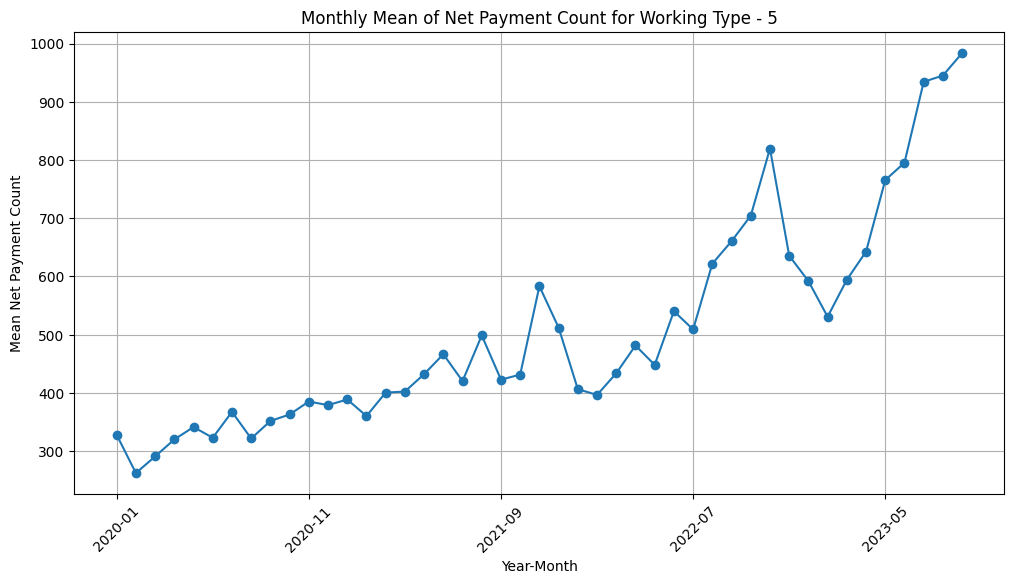

In [16]:
plot_monthly_mean(train, 'working_type', 'Working Type - 5')

C:\Users\enesm\AppData\Local\Temp\ipykernel_32228\3838293721.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year_Month'] = filtered_data['year'].astype(str) + '-' + filtered_data['month'].astype(str).str.zfill(2)


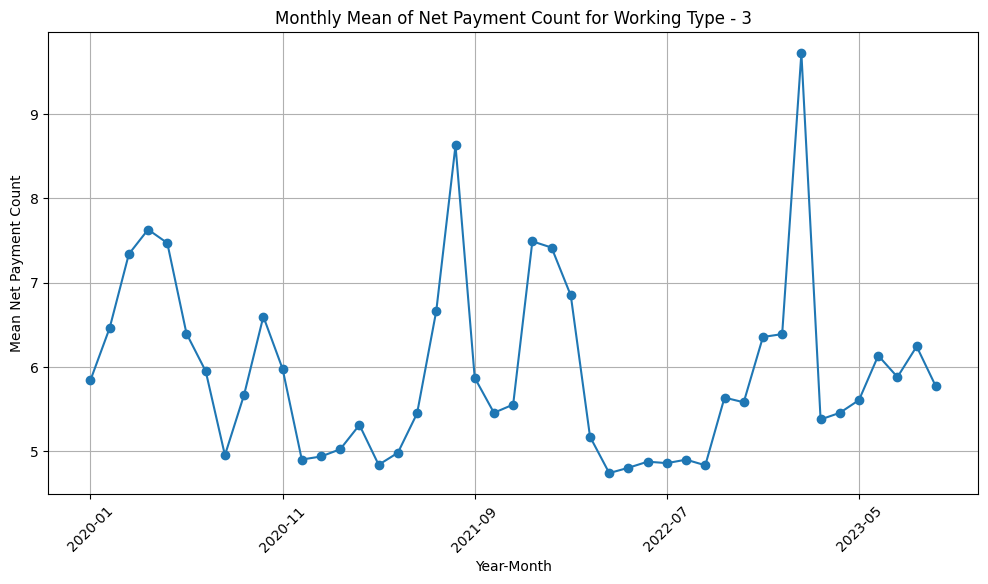

In [17]:
plot_monthly_mean(train, 'working_type', 'Working Type - 3')

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

# Load data
data = train.copy()

# Normalize net_payment_count
scaler = StandardScaler()
data['normalized_payment'] = scaler.fit_transform(data[['net_payment_count']])

# Clustering
kmeans = KMeans(n_clusters=3) # Example: 3 clusters
data['cluster'] = kmeans.fit_predict(data[['normalized_payment']])

# Time Series Modeling (Example for one cluster)
cluster_1_data = data[data['cluster'] == 1]



c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
cluster_1_data

,merchant_id,month_id,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count,year,month,normalized_payment,cluster
15691,merchant_60635,202005,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_55,Segment - 2,295715,2020,5,27.290362,1
20398,merchant_60635,202006,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_55,Segment - 2,465672,2020,6,42.997081,1
25318,merchant_60635,202007,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_55,Segment - 2,404301,2020,7,37.325429,1
30309,merchant_60635,202008,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_55,Segment - 2,427538,2020,8,39.472896,1
47442,merchant_8318,202011,Merchant Source - 3,Settlement Period - 3,Working Type - 5,mcc_179,Segment - 2,216282,2020,11,19.949495,1
...,...,...,...,...,...,...,...,...,...,...,...,...
277044,merchant_56211,202308,Merchant Source - 3,Settlement Period - 1,Working Type - 5,mcc_135,Segment - 2,195879,2023,8,18.063934,1
279607,merchant_67459,202308,Merchant Source - 1,Settlement Period - 2,Working Type - 5,mcc_35,Segment - 3,362909,2023,8,33.500152,1
284260,merchant_8318,202309,Merchant Source - 3,Settlement Period - 3,Working Type - 5,mcc_179,Segment - 2,452041,2023,9,41.737361,1
285249,merchant_33179,202309,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_25,Segment - 2,521533,2023,9,48.159523,1


# Target

In [51]:
train

,merchant_id,month_id,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count,year,month,Year_Month
0,merchant_43992,202001,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,4997,2020,1,2020-01
1,merchant_47611,202001,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_80,Segment - 3,19878,2020,1,2020-01
2,merchant_26604,202001,Merchant Source - 3,Settlement Period - 1,Working Type - 2,mcc_135,Segment - 4,2528,2020,1,2020-01
3,merchant_50657,202001,Merchant Source - 1,Settlement Period - 1,Working Type - 2,mcc_38,Segment - 4,89,2020,1,2020-01
4,merchant_60635,202001,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_55,Segment - 2,71957,2020,1,2020-01
...,...,...,...,...,...,...,...,...,...,...,...
291137,merchant_67083,202309,Merchant Source - 1,Settlement Period - 1,Working Type - 6,mcc_169,Segment - 4,4,2023,9,2023-09
291138,merchant_4263,202309,Merchant Source - 2,Settlement Period - 1,Working Type - 6,mcc_73,Segment - 4,4,2023,9,2023-09
291139,merchant_11346,202309,Merchant Source - 1,Settlement Period - 1,Working Type - 6,mcc_169,Segment - 4,3,2023,9,2023-09
291140,merchant_21397,202309,Merchant Source - 1,Settlement Period - 1,Working Type - 6,mcc_168,Segment - 4,3,2023,9,2023-09


In [61]:
X=train.drop('net_payment_count',axis=1)
y=train[['net_payment_count']]

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# Example usage of TimeSeriesSplit for expanding window cross-validation
tscv = TimeSeriesSplit(n_splits=5)  # max_train_size is None by default, which is ideal for expanding window

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train and validate your model on X_train, y_train, X_test, y_test 

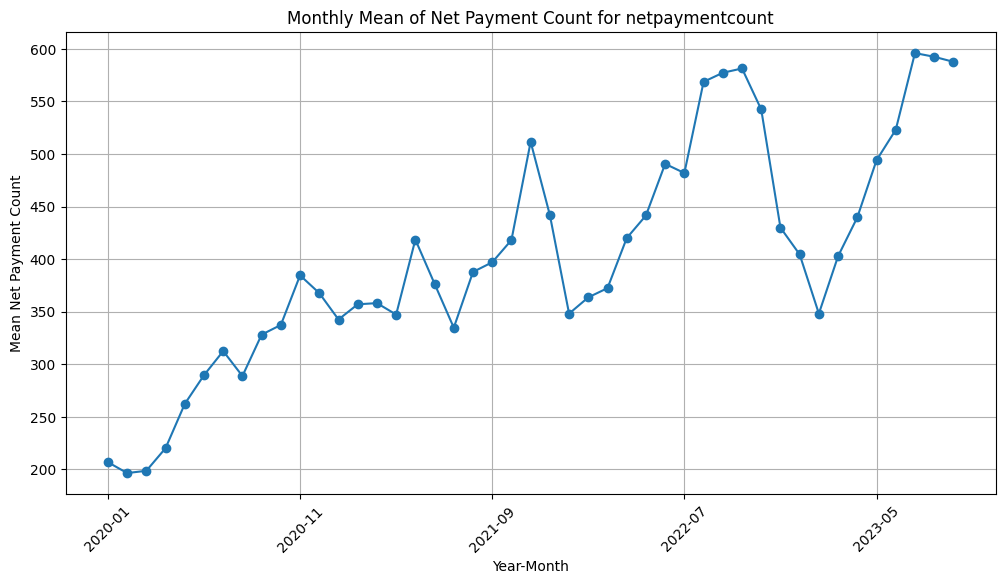

In [46]:

filtered_data = train

# Create a 'Year-Month' column for grouping
filtered_data['Year_Month'] = filtered_data['year'].astype(str) + '-' + filtered_data['month'].astype(str).str.zfill(2)

# Group by 'Year-Month' and calculate the mean
monthly_mean = filtered_data.groupby('Year_Month')['net_payment_count'].mean()

# Plotting
plt.figure(figsize=(12, 6))
monthly_mean.plot(kind='line', marker='o')
plt.title(f'Monthly Mean of Net Payment Count for netpaymentcount')
plt.xlabel('Year-Month')
plt.ylabel('Mean Net Payment Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




In [49]:
filtered_data['Year_Month'].unique()

array(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
       '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09'], dtype=object)

In [43]:
plot_monthly_mean(train, 'net_payment_count')

TypeError: plot_monthly_mean() missing 1 required positional argument: 'value'

# Expanding Windows CV  plot

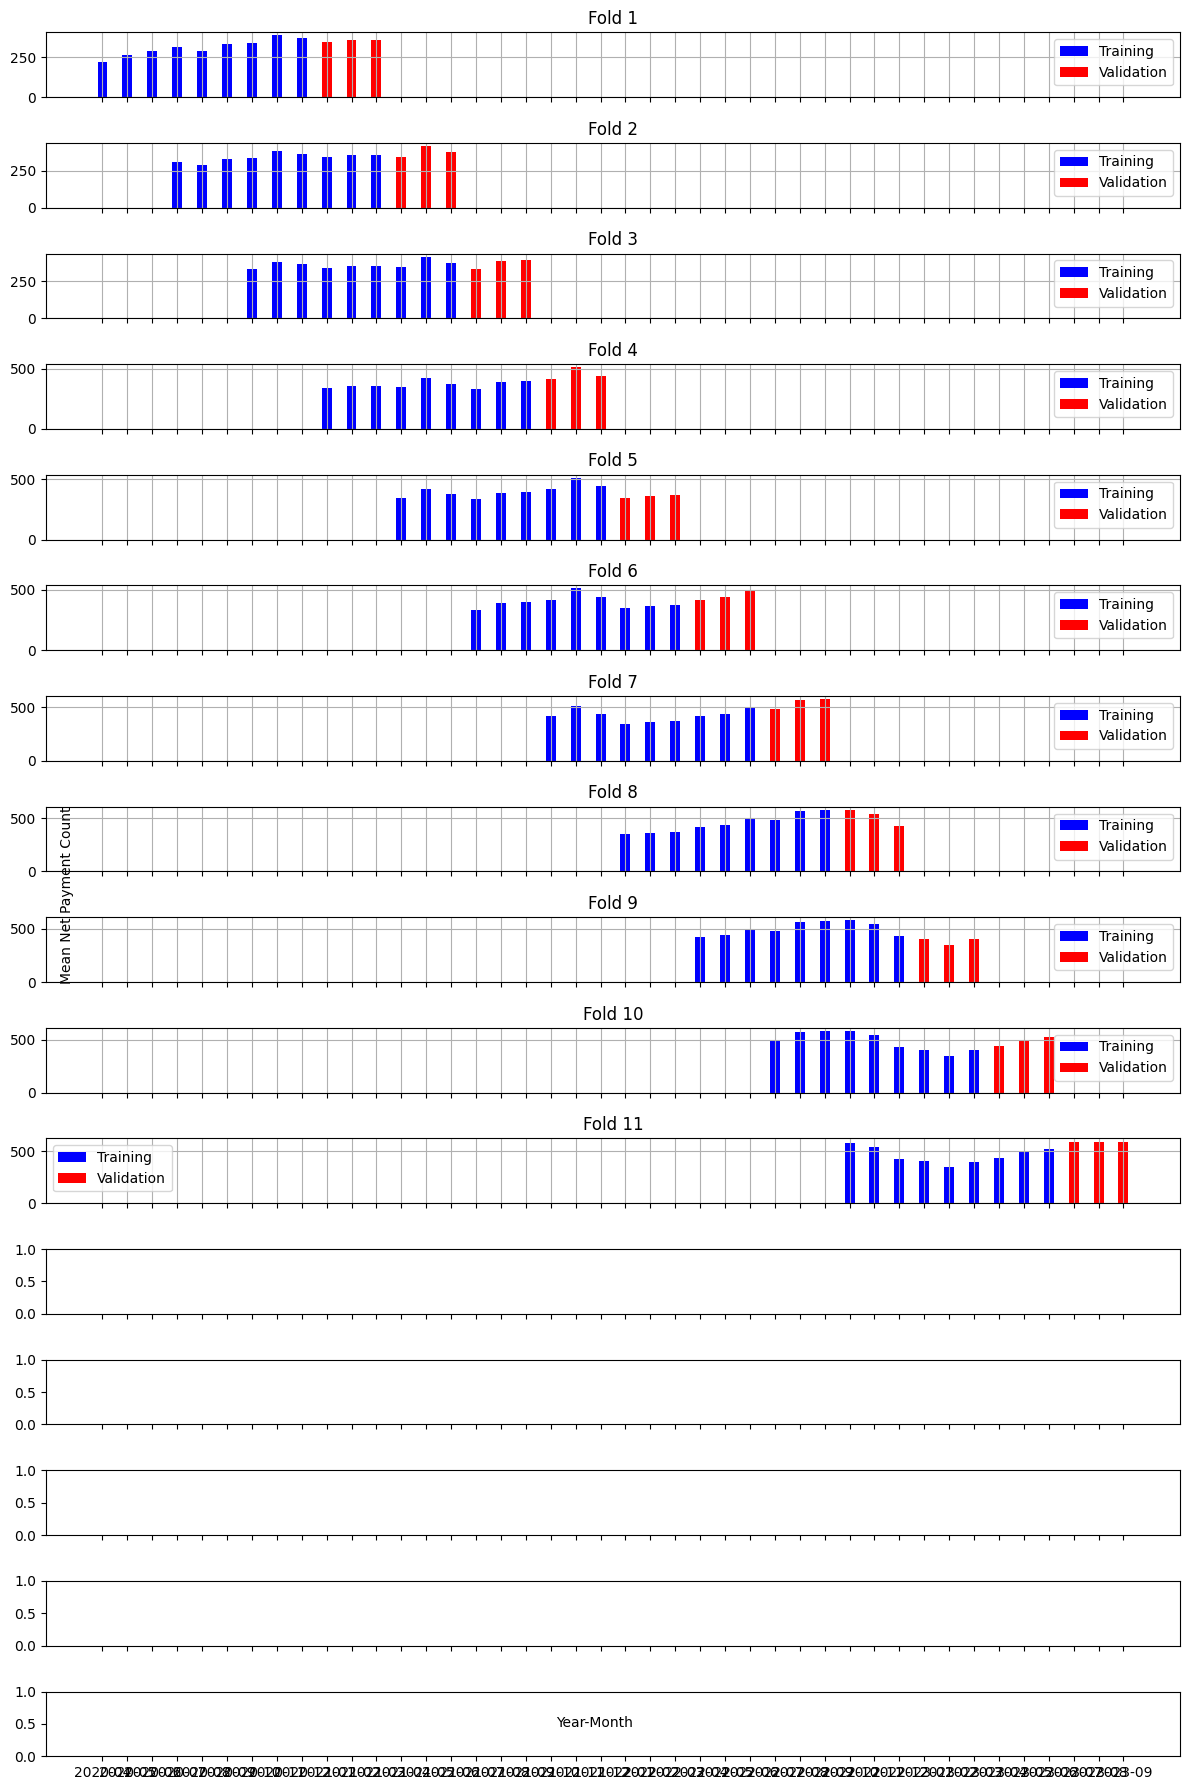

In [96]:
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'train' is your DataFrame with 'Year_Month' and 'net_payment_count'
# Calculate the mean of 'net_payment_count' for each 'Year_Month'
monthly_mean = train.groupby('Year_Month')['net_payment_count'].mean().reset_index()

# Now convert 'Year_Month' to datetime to sort and plot correctly
monthly_mean['Year_Month'] = pd.to_datetime(monthly_mean['Year_Month'])

# Sort the values by 'Year_Month'
monthly_mean.sort_values('Year_Month', inplace=True)

# Assuming X is a range index corresponding to the DataFrame index
X = np.arange(len(monthly_mean))
y = monthly_mean['net_payment_count'].values
dates = monthly_mean['Year_Month'].dt.strftime('%Y-%m')

# TimeSeriesSplit for expanding window cross-validation
tscv = TimeSeriesSplit(n_splits=11,max_train_size=9)

fig, axs = plt.subplots(16, figsize=(12, 18), sharex=True)

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    # Plot training data
    axs[i].bar(dates[train_index], y[train_index], color='blue', label='Training', width=0.4)
    
    # Plot validation data
    axs[i].bar(dates[test_index], y[test_index], color='red', label='Validation', width=0.4)
    
    axs[i].set_title(f'Fold {i+1}')
    axs[i].legend()
    axs[i].grid(True)

    # Rotate x-axis labels if needed
    for label in axs[i].get_xticklabels():
        label.set_rotation(45)
        label.set_fontsize(8)  # Set a smaller font size

# Set common labels
fig.text(0.5, 0.04, 'Year-Month', ha='center', va='center')
fig.text(0.06, 0.5, 'Mean Net Payment Count', ha='center', va='center', rotation='vertical')

plt.tight_layout()  # Adjust the layout
plt.show()


C:\Users\enesm\AppData\Local\Temp\ipykernel_40136\3115721701.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(dates, rotation=45, fontsize=8)
C:\Users\enesm\AppData\Local\Temp\ipykernel_40136\3115721701.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(dates, rotation=45, fontsize=8)
C:\Users\enesm\AppData\Local\Temp\ipykernel_40136\3115721701.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(dates, rotation=45, fontsize=8)
C:\Users\enesm\AppData\Local\Temp\ipykernel_40136\3115721701.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(dates, rotation=45, fontsize=8)
C:\Users\enesm\AppData\Local\Temp\ipykernel_40136\3115721701.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(dates, rotation=45, fontsize=8)


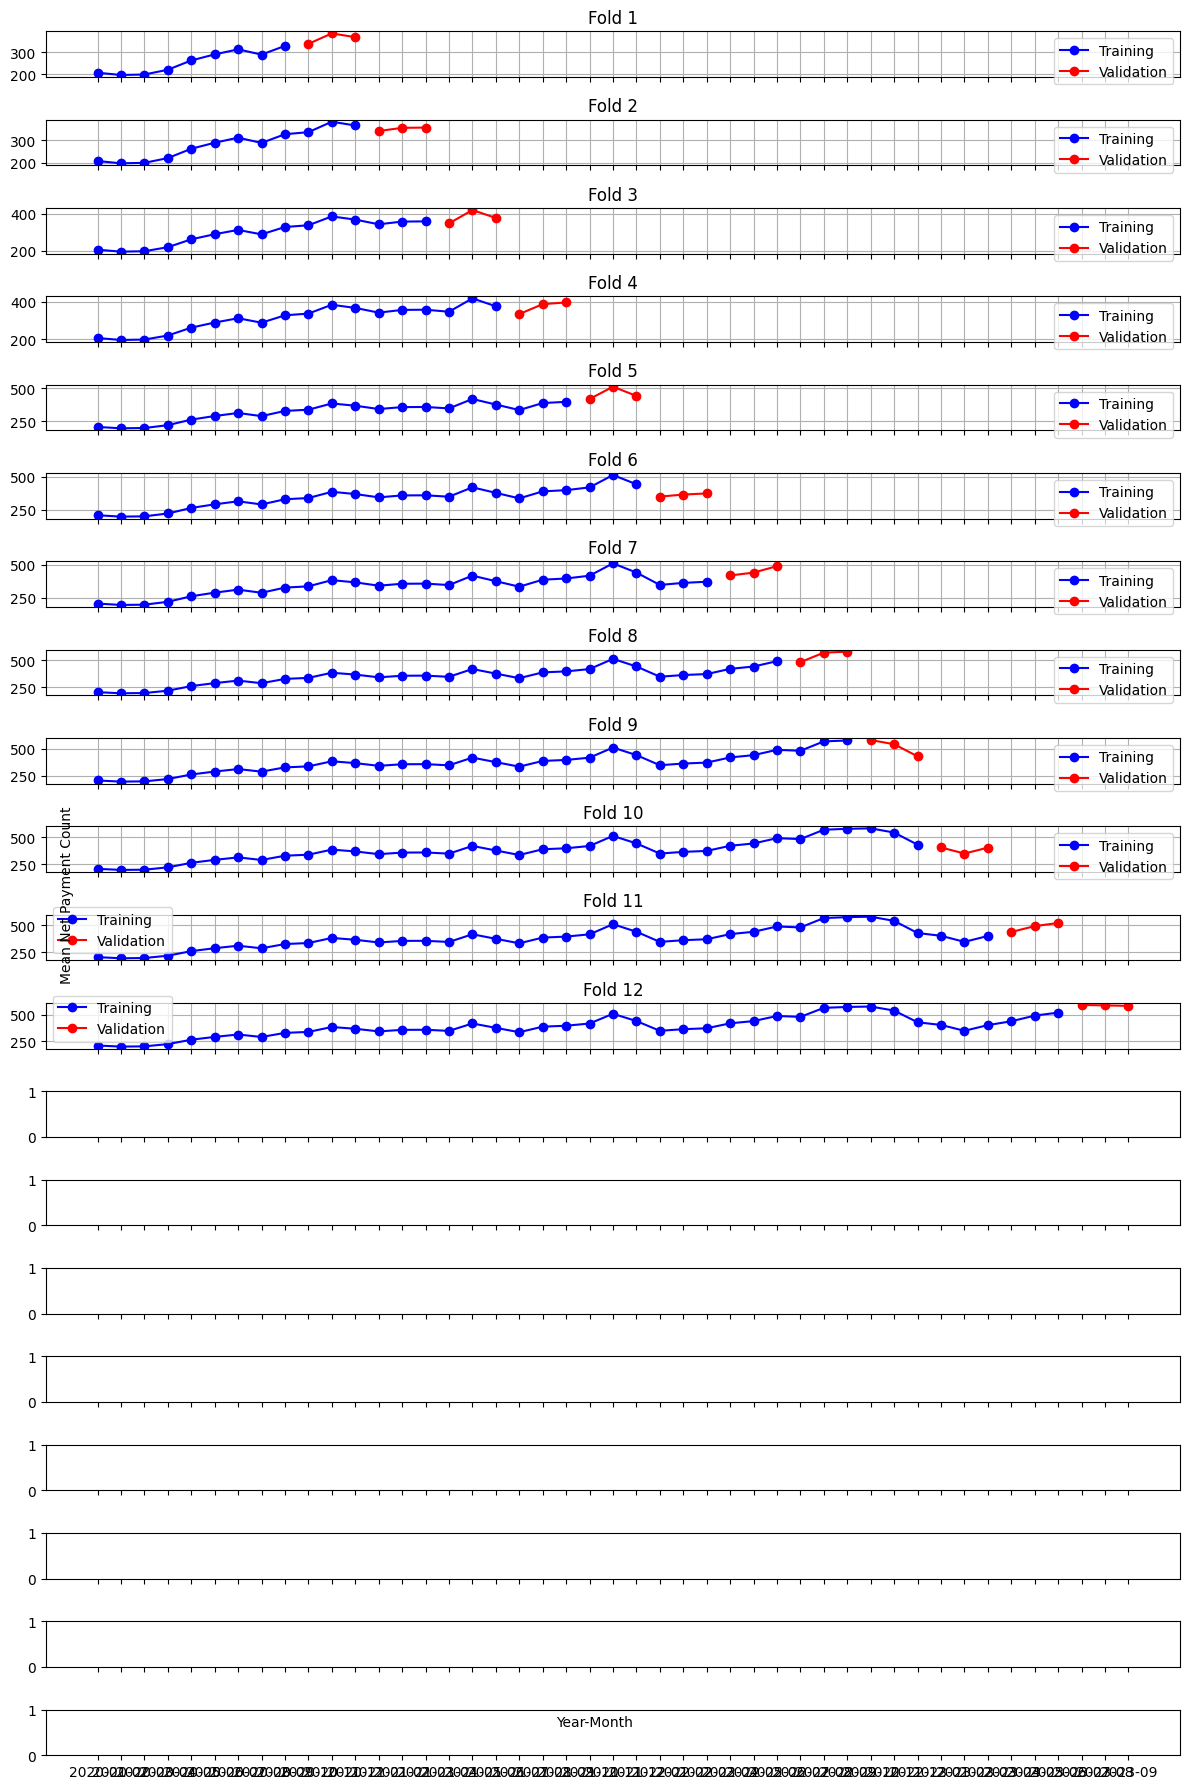

In [98]:
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'train' is your DataFrame with 'Year_Month' and 'net_payment_count'
# Calculate the mean of 'net_payment_count' for each 'Year_Month'
monthly_mean = train.groupby('Year_Month')['net_payment_count'].mean().reset_index()

# Now convert 'Year_Month' to datetime to sort and plot correctly
monthly_mean['Year_Month'] = pd.to_datetime(monthly_mean['Year_Month'])

# Sort the values by 'Year_Month'
monthly_mean.sort_values('Year_Month', inplace=True)

# Assuming X is a range index corresponding to the DataFrame index
X = np.arange(len(monthly_mean))
y = monthly_mean['net_payment_count'].values
dates = monthly_mean['Year_Month'].dt.strftime('%Y-%m')

# TimeSeriesSplit for expanding window cross-validation
tscv = TimeSeriesSplit(n_splits=12)

fig, axs = plt.subplots(20, figsize=(12, 18), sharex=True)

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    # Plot training data
    axs[i].plot(dates[train_index], y[train_index], color='blue', label='Training', marker='o')
    
    # Plot validation data
    axs[i].plot(dates[test_index], y[test_index], color='red', label='Validation', marker='o')
    
    axs[i].set_title(f'Fold {i+1}')
    axs[i].legend()
    axs[i].grid(True)

    # Rotate x-axis labels if needed and adjust font size
    axs[i].set_xticklabels(dates, rotation=45, fontsize=8)

# Set common labels
fig.text(0.5, 0.04, 'Year-Month', ha='center', va='center')
fig.text(0.06, 0.5, 'Mean Net Payment Count', ha='center', va='center', rotation='vertical')

plt.tight_layout()  # Adjust the layout
plt.show()


# Categories

In [27]:
train.head(10)

,merchant_id,month_id,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count,year,month
0,merchant_43992,202001,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,4997,2020,1
1,merchant_47611,202001,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_80,Segment - 3,19878,2020,1
2,merchant_26604,202001,Merchant Source - 3,Settlement Period - 1,Working Type - 2,mcc_135,Segment - 4,2528,2020,1
3,merchant_50657,202001,Merchant Source - 1,Settlement Period - 1,Working Type - 2,mcc_38,Segment - 4,89,2020,1
4,merchant_60635,202001,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_55,Segment - 2,71957,2020,1
5,merchant_41304,202001,Merchant Source - 3,Settlement Period - 1,Working Type - 6,mcc_80,Segment - 4,86,2020,1
6,merchant_36759,202001,Merchant Source - 3,Settlement Period - 1,Working Type - 2,mcc_168,Segment - 4,47,2020,1
7,merchant_771,202001,Merchant Source - 1,Settlement Period - 1,Working Type - 5,mcc_1,Segment - 4,215,2020,1
8,merchant_44490,202001,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_168,Segment - 2,3425,2020,1
9,merchant_46560,202001,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_126,Segment - 2,10175,2020,1
